# WeatherPy
----

### Analysis
* Coudiness does not appear to correlate with Latitude.
* Low Humidity appears less frequently in the Southern Hemisphere
* Temperature strongly correlates with Latitude, higher temperatures occur more frequently near the equator. 
---

In [1]:
#Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key
import api_keys
from citipy import citipy
output_data_file = "cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create lists
lat_lngs = []
cities = []

#Randomize Lat and Lng
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Approximate Cities
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #URL Fix
    city = city.replace(" ", "%20")
    
    #Add new cities to the list
    if city not in cities:

        cities.append(city)

# Check city count is >500
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
#more lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Counter for loop
record = 1

print(f"Connecting to OpenWeatherMap API")
print(f"===================================")

# Pull required info in a loop for all cities
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Add to counter
        record= record + 1
        
        # API rate limit
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("No match found. Skipping to next city.")
    continue

Connecting to OpenWeatherMap API
Processing Record 1 | Bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=bluff
Processing Record 2 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=ushuaia
Processing Record 3 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=hasaki
Processing Record 4 | Hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=hokitika
Processing Record 5 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=port%20elizabeth
Processing Record 6 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=mataura
Processing Record 7 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0d

Processing Record 56 | Filingue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=filingue
Processing Record 57 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=atuona
Processing Record 58 | Baia de Cris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=baia%20de%20cris
Processing Record 59 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=ponta%20do%20sol
Processing Record 60 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=mitsamiouli
Processing Record 61 | Sao Joao da Barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=sao%20joao%20da%20barra
Processing Record 62 | The Pas
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 110 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=port%20blair
Processing Record 111 | Rae Bareli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=rae%20bareli
Processing Record 112 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=san%20patricio
Processing Record 113 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=mareeba
Processing Record 114 | San Ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=san%20ramon
Processing Record 115 | Hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=hobyo
Processing Record 116 | Tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0db

Processing Record 164 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=hilo
Processing Record 165 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=lata
Processing Record 166 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=nanortalik
Processing Record 167 | Port-Cartier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=port-cartier
Processing Record 168 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=saldanha
Processing Record 169 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=salalah
Processing Record 170 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=

Processing Record 220 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=banda%20aceh
Processing Record 221 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=yellowknife
Processing Record 222 | Denpasar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=denpasar
Processing Record 223 | Trairi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=trairi
No match found. Skipping to next city.
Processing Record 224 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=oistins
No match found. Skipping to next city.
Processing Record 225 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=cidreira
Processing Record 226 | Jiuquan
http://api.ope

Processing Record 274 | Medea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=medea
Processing Record 275 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=mar%20del%20plata
Processing Record 276 | Lysva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=lysva
Processing Record 277 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=yulara
No match found. Skipping to next city.
Processing Record 278 | Katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=katherine
Processing Record 279 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=talnakh
Processing Record 280 | Lauro Muller
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 328 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=dunedin
Processing Record 329 | Namtsy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=namtsy
Processing Record 330 | Nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=nalut
No match found. Skipping to next city.
Processing Record 331 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=chuy
Processing Record 332 | Basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=basoko
Processing Record 333 | Nerchinskiy Zavod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=nerchinskiy%20zavod
Processing Record 334 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

No match found. Skipping to next city.
Processing Record 384 | Yuksekova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=yuksekova
Processing Record 385 | Venado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=venado
Processing Record 386 | Bonavista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=bonavista
Processing Record 387 | Kolaras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=kolaras
Processing Record 388 | Fort Dodge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=fort%20dodge
Processing Record 389 | Oksfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=oksfjord
Processing Record 390 | Thrissur
http://api.openweathermap.org/data/2.5/weather?units=I

No match found. Skipping to next city.
Processing Record 439 | Tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=tocopilla
Processing Record 440 | Suzun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=suzun
Processing Record 441 | Cap-aux-Meules
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=cap-aux-meules
Processing Record 442 | Waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=waipawa
Processing Record 443 | Siocon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=siocon
Processing Record 444 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=takoradi
Processing Record 445 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=

Processing Record 494 | Kalabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=kalabo
Processing Record 495 | Black River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=black%20river
Processing Record 496 | Antalaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=antalaha
No match found. Skipping to next city.
Processing Record 497 | Eidsvag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=eidsvag
Processing Record 498 | Kota Belud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=kota%20belud
Processing Record 499 | Riacho de Santana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c2a6eaabff0dbb03f72ea39f2b35329&q=riacho%20de%20santana
Processing Record 500 | Charters Towers
http://api.openweathe

In [5]:
#Create a dictionary
weatherpy_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

#Create DataFrame
weather_data = pd.DataFrame(weatherpy_dictionary)

#Display count to check for missing info
weather_data.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Export the city data into a .csv.
weather_data.to_csv('all_data_retrieved.csv')

# Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,100,AU,1562365525,86,-23.58,149.07,59.81,22.15
1,Ushuaia,75,AR,1562365527,80,-54.81,-68.31,39.20,6.93
2,Hasaki,75,JP,1562365528,94,35.73,140.83,68.00,13.87
3,Hokitika,0,NZ,1562365529,56,-42.72,170.96,44.33,4.97
4,Port Elizabeth,40,US,1562365391,83,39.31,-74.98,87.01,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

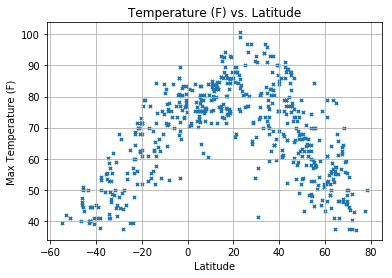

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="x", s=10)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

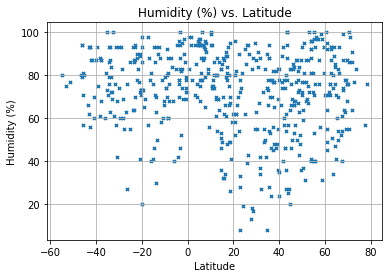

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="x", s=10)
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

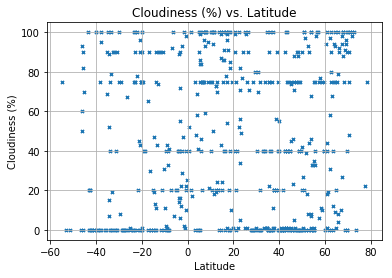

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="x", s=10)
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

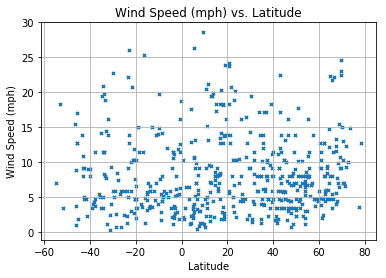

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="x", s=10)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("WindSpeed.png")
plt.show()